In [1]:
import pandas as pd
import numpy as np

In [557]:
claritas = pd.read_csv('../Downloads/zip_dem_term.csv')

zipwho = pd.read_csv('../Downloads/zipwho.csv')


cols = zipwho.columns.values


new_cols= []
for col in cols[::-1]:
    new_cols.append(col)
zipwho = zipwho[new_cols]    

def fixZip(row):
    if row['zip_code']<10000:
        return '0' + str(row['zip_code'])
    else:
        return str(row['zip_code'])

zipwho['zip_code'] = zipwho.apply(fixZip,axis=1)
claritas['zip_code'] = claritas.apply(fixZip,axis=1)
zipwho['zip_code'] = zipwho['zip_code'].apply(lambda x: x[:-2])

In [558]:
df = pd.merge(zipwho, claritas,on = 'zip_code')

In [559]:
Austin_zips = '78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681, 78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759'

Austin_zips = Austin_zips.split(', ')

len(Austin_zips)

def findAustinZips(row):
    if row['zip_code'] in Austin_zips:
        return 1
    else:
        return 0

df['Austin'] = df.apply(findAustinZips, axis = 1)

Austin = df[df['Austin']==1]

Austin.shape

(50, 161)

In [421]:
incidents = pd.read_csv('../Downloads/Officer_Involved_Shootings_2007-16_Incidents.csv')

subjects = pd.read_csv('../Downloads/Officer_Involved_Shootings_2007-16__Subjects.csv')

office = pd.read_csv('../Downloads/2007-16_Officer_Involved_Shooting_dataset_Officers.csv')

In [422]:
incidents['address'] = incidents['Location 1'].apply(lambda x: x.split('\n')[0].split('(')[0].split('/')[0])

In [423]:
incidents['address']

0                 12501Tech Ridge Blvd
1         4201Monterrey Oaks Boulevard
2     Omni Hotel, 700 San Jacinto Blvd
3                            W 35th St
4                  3630 S Congress Ave
5                       8206 Pax Drive
6               4404 E Oltorf St #7202
7                  7201 Wood Hollow Dr
8                3708 Aspen Creek Pkwy
9                    6000 Cougar Drive
10                   9400 Claxton Dr. 
11        7112 Ed Bluestein Blvd SB #A
12                        508 West Ave
13         12000 block of Natures Bend
14                  120 W Slaughter Ln
15                 4714 S Congress Ave
16            10607 Golden Quail Drive
17                  6409 Springdale Rd
18                  1515 Wickersham Ln
19                    6505 Shirley Ave
20                   1205 Silverton Ct
21        801 E William Cannon Dr #135
22                      13712 Maye Pl.
23              9416 Neils Thompson Dr
24               9218 Balcones Club Dr
25                      6

In [424]:
incidents.to_csv('../Desktop/incidents.csv', index = False)

In [60]:
incidents = pd.read_csv('../Desktop/incidents.csv')

In [425]:
from bs4 import BeautifulSoup
import requests

In [426]:
def findZip(row):
    try:
        url = 'http://www.melissadata.com/lookups/AddressCheck.asp?LuAd=SSIS&email=&exprbox=&suites=&address=&address2=&city=&state=&zip=&dragbox={}%0D%0AAustin%0D%0ATX'.format(row['address'].replace(' ', '+'))
        response = requests.get(url)
        
        return response.content.split('zip4=')[1][:5]
    except Exception as e:
        print e
        return np.nan
    

In [427]:
def findZip2(row):
    try:
        url = 'https://www.zip-codes.com/search.asp?fld-address={}&fld-address2=&fld-city=Austin&fld-state=TX&fld-zip=&srch-type=address&selectTab=1&Submit=Find+ZIP+Code+of+this+U.S.+Address'.format(row['address'].replace(' ', '+'))
        response = requests.get(url)
        return response.content.split(row['address'])[1].split('0000;">')[1][:5]
    except Exception as e:
        print e
        return np.nan

In [428]:
incidents['zip_code'] = incidents.apply(findZip2, axis=1)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


In [102]:
incidents.to_csv('incidents2.csv', index=False)

In [429]:
incidents['zip_code'].iloc[3] = '78705'

In [430]:
incidents['zip_code'].iloc[9] = '78705'
incidents['zip_code'].iloc[10] = '78745'
incidents['zip_code'].iloc[11] = '78736'
incidents['zip_code'].iloc[28] = '78702'
incidents['zip_code'].iloc[29] = '78758'
incidents['zip_code'].iloc[33] = '78749'
incidents['zip_code'].iloc[34] = '78753'
incidents['zip_code'].iloc[35] = '78741'
incidents['zip_code'].iloc[36] = '78721'
incidents['zip_code'].iloc[40] = '77833'
incidents['zip_code'].iloc[41] = '78723'
incidents['zip_code'].iloc[51] = '78741'
incidents['zip_code'].iloc[52] = '78753'


In [431]:
incidents['zip_code'].iloc[50] = '78702'

In [121]:
incidents['year']= incidents['Date'].apply(lambda x: x.split('/')[-1])

In [130]:
incidents2 = pd.get_dummies(incidents, columns = ['Day Part'])

In [134]:
pd.set_option('max_columns', 999)

In [189]:
incidents2.head()

,Case,Date,Time,Premise Category,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Day of Week_Fri,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Inside Outside_Inside,Inside Outside_Inside / Outside,Inside Outside_Outside,Subject Weapon_air pistol (BB gun),Subject Weapon_gun,"Subject Weapon_gun, vehicle",Subject Weapon_handgun,Subject Weapon_knife,Subject Weapon_knife (machete),Subject Weapon_mic cord,Subject Weapon_none,Subject Weapon_none (radio face plate),Subject Weapon_pellet gun,Subject Weapon_rifle,Subject Weapon_vehicle,Day Part_Day,Day Part_Evening,Day Part_Night,Day Part_Night / Day,Day Part_day,Day Part_night,knife,gun,no_weapon,other weapon,vehicle,other_weapon
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,Parking Lot,Yes - impact weapon,2,armed subject,14,4,12501Tech Ridge Blvd\r,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,False,0,True
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,Parking Lot,Yes - Taser,2,suspicious person/call,4,5,4201Monterrey Oaks Boulevard\r,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,False,0,True
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,Business,No,1,shots fired,3,10,"Omni Hotel, 700 San Jacinto Blvd\r",700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,False,0,True
3,13-5033792\r13-2071392,7/26/13,16:10,Under Bridge,No,1,self-initiated,1,1,W 35th St/W 34th St (3500 CRAWFORD AVE)\r,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,False,0,True
4,11-5038917\r11-2271207,8/15/11,16:50,Street,No,2,robbery,3,0,"3630 S Congress Ave\r(36.680211, -120.158051)",3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False,0,True


In [179]:
def fixDummies0(row):
    if row['Subject Weapon_knife (machete)']==1 or row['Subject Weapon_knife']==1:
        return 1
    else:
        return 0

In [180]:
incidents2['knife'] = incidents2.apply(fixDummies0, axis=1)

In [181]:
def fixDummies1(row):
    if row['Subject Weapon_air pistol (BB gun)'] or row['Subject Weapon_pellet gun'] or row['Subject Weapon_rifle'] ==1 or row['Subject Weapon_gun']==1 or row['Subject Weapon_handgun']==1 or row['Subject Weapon_gun, vehicle']==1:
        return 1
    else:
        return 0

In [182]:
incidents2['gun']= incidents2.apply(fixDummies1, axis=1)

In [183]:
def fixDummies2(row):
    if row['Subject Weapon_none (radio face plate)']==1 or row['Subject Weapon_none']==1:
        return 1
    else:
        return 0

In [184]:
incidents2['no_weapon'] = incidents.apply(fixDummies2, axis=1)

In [185]:
incidents2['vehicle'] = incidents2['Subject Weapon_vehicle']

In [192]:
incidents2['other_weapon'] = (incidents2['knife']==0) &(incidents2['gun']==0)&(incidents2['no_weapon']==0)& (incidents2['vehicle']==0)

In [193]:
incidents2['other_weapon'].sum()

1

In [194]:
incidents2 = incidents2[[x for x in incidents2.columns if 'Subject' not in x]]

In [195]:
incidents2

,Case,Date,Time,Premise Category,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Day of Week_Fri,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Inside Outside_Inside,Inside Outside_Inside / Outside,Inside Outside_Outside,Day Part_Day,Day Part_Evening,Day Part_Night,Day Part_Night / Day,Day Part_day,Day Part_night,knife,gun,no_weapon,other weapon,vehicle,other_weapon
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,Parking Lot,Yes - impact weapon,2,armed subject,14,4,12501Tech Ridge Blvd\r,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,False,0,False
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,Parking Lot,Yes - Taser,2,suspicious person/call,4,5,4201Monterrey Oaks Boulevard\r,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,False,0,False
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,Business,No,1,shots fired,3,10,"Omni Hotel, 700 San Jacinto Blvd\r",700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False
3,13-5033792\r13-2071392,7/26/13,16:10,Under Bridge,No,1,self-initiated,1,1,W 35th St/W 34th St (3500 CRAWFORD AVE)\r,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,False,0,False
4,11-5038917\r11-2271207,8/15/11,16:50,Street,No,2,robbery,3,0,"3630 S Congress Ave\r(36.680211, -120.158051)",3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,False,0,False
5,15-0381788\r15-5005471\r15-5006662,2/8/15,12:09,Yard/Courtyard,No,1,shots fired,26,1,"8206 Pax Drive\r(30.244609, -97.888612)",8206 Pax Drive,78736,15,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,False,0,False
6,07-2391583,8/27/07,18:03,Residence,No,1,stabbing,2,2,"4404 E Oltorf St #7202\r(30.226757, -97.726269)",4404 E Oltorf St,78741,07,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,False,0,False
7,12-5005552\r12-0341696,2/3/12,21:33,Parking Lot,No,1,check welfare,16,1,"7201 Wood Hollow Dr\r(30.355057, -97.752106)",7201 Wood Hollow Dr,78731,12,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,False,0,False
8,11-3390300,12/5/11,6:53,Street,No,2,burglary,10,3,"3708 Aspen Creek Pkwy\r(30.181769, -97.856042)",3708 Aspen Creek Pkwy,78749,11,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,True,1,False
9,16-1660189\r16-5024527,6/14/16,6:00,Street,No,1,armed subject,21,1,"6000 Cougar Drive\r(35.977325, -84.030937)",6000 Cougar Dr.,78705,16,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,False,0,False


In [202]:
incidents2.rename_axis({'Inside  Outside_Inside': 'inside', 'Inside  Outside_Inside / Outside':' inside/outside', 'Inside  Outside_Outside':'outside'}, axis=1, inplace=True)

/Users/andrewadelson/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [203]:
incidents2.head()

,Case,Date,Time,Premise Category,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Day of Week_Fri,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,inside,inside/outside,outside,Day Part_Day,Day Part_Evening,Day Part_Night,Day Part_Night / Day,Day Part_day,Day Part_night,knife,gun,no_weapon,other weapon,vehicle,other_weapon
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,Parking Lot,Yes - impact weapon,2,armed subject,14,4,12501Tech Ridge Blvd\r,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,False,0,False
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,Parking Lot,Yes - Taser,2,suspicious person/call,4,5,4201Monterrey Oaks Boulevard\r,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,False,0,False
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,Business,No,1,shots fired,3,10,"Omni Hotel, 700 San Jacinto Blvd\r",700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False
3,13-5033792\r13-2071392,7/26/13,16:10,Under Bridge,No,1,self-initiated,1,1,W 35th St/W 34th St (3500 CRAWFORD AVE)\r,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,False,0,False
4,11-5038917\r11-2271207,8/15/11,16:50,Street,No,2,robbery,3,0,"3630 S Congress Ave\r(36.680211, -120.158051)",3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,False,0,False


In [206]:
incidents2['night'] = (incidents2['Day Part_Evening']==1) | (incidents2['Day Part_Night']==1) | (incidents2['Day Part_night']==1) 

In [208]:
incidents2['day'] = (incidents2['Day Part_Day']==1) | (incidents2['Day Part_day']==1) 

In [209]:
incidents2['day_nights'] = incidents2['Day Part_Night / Day']

In [210]:
incidents2 = incidents2[[x for x in incidents2.columns if 'Day Part' not in x]]

In [211]:
incidents2.head(0)

,Case,Date,Time,Premise Category,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Day of Week_Fri,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights


In [213]:
incidents2.rename_axis(axis=1, mapper = {'Day of Week_Fri': 'Fri', 'Day of Week_Sat': 'Sat','Day of Week_Sun': 'Sun','Day of Week_Mon': 'Mon','Day of Week_Tue': 'Tue','Day of Week_Wed': 'Wed','Day of Week_Thu': 'Thur'}, inplace=True)

In [214]:
incidents2.head(0)

,Case,Date,Time,Premise Category,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights


In [216]:
for place in incidents2['Premise Category'].unique():
    incidents2[place] = incidents2['Premise Category'] == place

/Users/andrewadelson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [217]:
incidents2.head(0)

,Case,Date,Time,Premise Category,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park


In [218]:
incidents2.drop('Premise Category', axis= 1, inplace=True)

In [219]:
incidents2.head()

,Case,Date,Time,Less Lethal Force used by APD prior to shooting?,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,Yes - impact weapon,2,armed subject,14,4,12501Tech Ridge Blvd\r,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,False,True,0,True,False,False,False,False,False,False,False
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,Yes - Taser,2,suspicious person/call,4,5,4201Monterrey Oaks Boulevard\r,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,False,0,False,True,False,0,True,False,False,False,False,False,False,False
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,No,1,shots fired,3,10,"Omni Hotel, 700 San Jacinto Blvd\r",700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,False,0,False,True,False,0,False,True,False,False,False,False,False,False
3,13-5033792\r13-2071392,7/26/13,16:10,No,1,self-initiated,1,1,W 35th St/W 34th St (3500 CRAWFORD AVE)\r,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,False,0,False,True,False,0,False,False,True,False,False,False,False,False
4,11-5038917\r11-2271207,8/15/11,16:50,No,2,robbery,3,0,"3630 S Congress Ave\r(36.680211, -120.158051)",3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,True,False,0,False,False,False,True,False,False,False,False


In [220]:
incidents2['Less Lethal Force used by APD prior to shooting?'].unique()

array(['Yes - impact weapon', 'Yes - Taser', 'No', 'no',
       'Yes - Taser and Weaponless', 'Yes - weaponless'], dtype=object)

In [221]:
def lethal(row):
    if 'Yes' in row['Less Lethal Force used by APD prior to shooting?']:
        return 1
    else:
        return 0
def lethal_type(row):
    if row['lethal']==0:
        return np.nan
    else:
        return row['Less Lethal Force used by APD prior to shooting?'].split(' - ')[1].split(' and')[0]

In [222]:
incidents2['lethal'] = incidents2.apply(lethal, axis=1)
incidents2['lethal_type'] = incidents2.apply(lethal_type, axis=1)

In [223]:
incidents2['lethal'].mean()

0.13793103448275862

In [225]:
incidents2.drop("Less Lethal Force used by APD prior to shooting?", axis=1, inplace=True)

In [227]:
incidents2.head()

,Case,Date,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,lethal_type
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,2,armed subject,14,4,12501Tech Ridge Blvd\r,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,False,True,0,True,False,False,False,False,False,False,False,1,impact weapon
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,2,suspicious person/call,4,5,4201Monterrey Oaks Boulevard\r,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,False,0,False,True,False,0,True,False,False,False,False,False,False,False,1,Taser
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,1,shots fired,3,10,"Omni Hotel, 700 San Jacinto Blvd\r",700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,False,0,False,True,False,0,False,True,False,False,False,False,False,False,0,NaN
3,13-5033792\r13-2071392,7/26/13,16:10,1,self-initiated,1,1,W 35th St/W 34th St (3500 CRAWFORD AVE)\r,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,False,0,False,True,False,0,False,False,True,False,False,False,False,False,0,NaN
4,11-5038917\r11-2271207,8/15/11,16:50,2,robbery,3,0,"3630 S Congress Ave\r(36.680211, -120.158051)",3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,True,False,0,False,False,False,True,False,False,False,False,0,NaN


In [235]:
incidents2 = pd.get_dummies(incidents2, columns = ['lethal_type'])

In [237]:
incidents2.head()

,Case,Date,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,Location 1,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,lethal_type_0,lethal_type_Taser,lethal_type_impact weapon,lethal_type_weaponless
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,2,armed subject,14,4,12501Tech Ridge Blvd\r,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,False,True,0,True,False,False,False,False,False,False,False,1,0,0,1,0
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,2,suspicious person/call,4,5,4201Monterrey Oaks Boulevard\r,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,False,0,False,True,False,0,True,False,False,False,False,False,False,False,1,0,1,0,0
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,1,shots fired,3,10,"Omni Hotel, 700 San Jacinto Blvd\r",700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,False,0,False,True,False,0,False,True,False,False,False,False,False,False,0,1,0,0,0
3,13-5033792\r13-2071392,7/26/13,16:10,1,self-initiated,1,1,W 35th St/W 34th St (3500 CRAWFORD AVE)\r,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,False,0,False,True,False,0,False,False,True,False,False,False,False,False,0,1,0,0,0
4,11-5038917\r11-2271207,8/15/11,16:50,2,robbery,3,0,"3630 S Congress Ave\r(36.680211, -120.158051)",3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,True,False,0,False,False,False,True,False,False,False,False,0,1,0,0,0


In [238]:
incidents2.drop('lethal_type_0', axis=1, inplace=True)

In [239]:
incidents2['taser'] = incidents2['lethal_type_Taser']
incidents2['impact_weapon'] = incidents2['lethal_type_impact weapon']
incidents2['weaponless'] = incidents2['lethal_type_weaponless']

In [240]:
incidents2= incidents2[[x for x in incidents2.columns if 'lethal_type' not in x]]

In [243]:
incidents2.columns

Index([u'Case ', u'Date', u'Time', u'Number of Officer Shooters',
       u'Call Type Categories', u'Officers Present When Shots Fired', u'Hits',
       u'Location 1', u'address', u'zip_code', u'year', u'Fri', u'Mon', u'Sat',
       u'Sun', u'Thur', u'Tue', u'Wed', u'inside', u' inside/outside',
       u'outside', u'knife', u'gun', u'no_weapon', u'other weapon', u'vehicle',
       u'other_weapon', u'night', u'day', u'day_nights', u'Parking Lot',
       u'Business', u'Under Bridge', u'Street', u'Yard/Courtyard',
       u'Residence', u'Residence / Parking Lot', u'Park', u'lethal', u'taser',
       u'impact_weapon', u'weaponless'],
      dtype='object')

In [244]:
incidents2.drop('Location 1', axis=1, inplace=True)

In [262]:
incidents2.shape

(58, 41)

In [246]:
incidents2.head()

,Case,Date,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,False,True,0,True,False,False,False,False,False,False,False,1,0,1,0
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,False,0,False,True,False,0,True,False,False,False,False,False,False,False,1,1,0,0
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,False,0,False,True,False,0,False,True,False,False,False,False,False,False,0,0,0,0
3,13-5033792\r13-2071392,7/26/13,16:10,1,self-initiated,1,1,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,False,0,False,True,False,0,False,False,True,False,False,False,False,False,0,0,0,0
4,11-5038917\r11-2271207,8/15/11,16:50,2,robbery,3,0,3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,False,0,False,True,False,0,False,False,False,True,False,False,False,False,0,0,0,0


In [254]:
for x in incidents2.columns:
    if str(type(incidents2[x].iloc[0])) =="<type 'numpy.bool_'>":
        incidents2[x] = incidents2[x].astype(int)

In [256]:
incidents2.head()

,Case,Date,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless
0,16-2492260\r16-5036999\r16-5036744,9/5/16,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,16-2581947\r16-5040418\r16-5038102,9/15/16,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,15-1860826\r15-5029094\r15-5030656,7/5/15,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,13-5033792\r13-2071392,7/26/13,16:10,1,self-initiated,1,1,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,11-5038917\r11-2271207,8/15/11,16:50,2,robbery,3,0,3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [278]:
incidents2['Location 1'] = incidents2['Location 1'].apply(lambda x: x.replace('\r', '\n'))

In [294]:
incidents2['Date'] = incidents2['Date'].apply(lambda x: pd.to_datetime(x))
incidents2['join'] = incidents2['Date'].apply(lambda x: str(x)) + incidents2['Location 1'].apply(lambda x: x[:3])

In [295]:
subjects['Date'] = subjects['Date'].apply(lambda x: pd.to_datetime(x))
subjects['join'] = subjects['Date'].apply(lambda x: str(x)) + subjects['Location 1'].apply(lambda x: x[:3])

In [296]:
data2 = pd.merge(incidents2, subjects, on = 'join')

In [309]:
data2.head()

,Case _x,Date_x,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Location 1_x,join,Case _y,Date_y,Subject Race Ethnicity,Subject Gender,Subject Age,Subject Injuries,Location 1_y
0,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,Hispanic,Male,35,killed,12501Tech Ridge Blvd\n
1,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,White,Male,34,killed,4201Monterrey Oaks Boulevard\n
2,15-1860826\r15-5029094\r15-5030656,2015-07-05,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Omni Hotel, 700 San Jacinto Blvd\n",2015-07-05 00:00:00Omn,15-1860826\n15-5029094\n15-5030656,2015-07-05,White,Male,35,killed,"Omni Hotel, 700 San Jacinto Blvd\n"
3,13-5033792\r13-2071392,2013-07-26,16:10,1,self-initiated,1,1,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,W 35th St/W 34th St (3500 CRAWFORD AVE)\n,2013-07-26 00:00:00W 3,13-5033792\n13-2071392,2013-07-26,Black,Male,32,killed,W 35th St/W 34th St (3500 CRAWFORD AVE)\n
4,11-5038917\r11-2271207,2011-08-15,16:50,2,robbery,3,0,3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"3630 S Congress Ave\n(36.680211, -120.158051)",2011-08-15 00:00:00363,11-5038917\n11-2271207,2011-08-15,White,Male,21,None,"3630 S Congress Ave\n(36.680211, -120.158051)"


In [313]:

for race in data2['Subject Race Ethnicity'].unique():
    data2[race] = (data2['Subject Race Ethnicity']== race).astype(int)

In [317]:
data2.drop('Subject Race Ethnicity', axis=1 , inplace=True)

In [321]:
for gender in data2['Subject Gender'].unique():
    data2[gender] = (data2['Subject Gender']==gender).astype(int)

In [322]:
data2.drop('Subject Gender', inplace=True, axis=1)

In [324]:
data2.head()

,Case _x,Date_x,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Location 1_x,join,Case _y,Date_y,Subject Age,Subject Injuries,Location 1_y,Hispanic,White,Black,Asian,Male,Female
0,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,killed,12501Tech Ridge Blvd\n,1,0,0,0,1,0
1,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,killed,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0
2,15-1860826\r15-5029094\r15-5030656,2015-07-05,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Omni Hotel, 700 San Jacinto Blvd\n",2015-07-05 00:00:00Omn,15-1860826\n15-5029094\n15-5030656,2015-07-05,35,killed,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,1,0
3,13-5033792\r13-2071392,2013-07-26,16:10,1,self-initiated,1,1,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,W 35th St/W 34th St (3500 CRAWFORD AVE)\n,2013-07-26 00:00:00W 3,13-5033792\n13-2071392,2013-07-26,32,killed,W 35th St/W 34th St (3500 CRAWFORD AVE)\n,0,0,1,0,1,0
4,11-5038917\r11-2271207,2011-08-15,16:50,2,robbery,3,0,3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"3630 S Congress Ave\n(36.680211, -120.158051)",2011-08-15 00:00:00363,11-5038917\n11-2271207,2011-08-15,21,None,"3630 S Congress Ave\n(36.680211, -120.158051)",0,1,0,0,1,0


In [325]:
data2['Subject Injuries'].unique()

array(['killed', 'None', 'shot (injured only)', 'injured',
       'killed (self-inflicted)'], dtype=object)

In [327]:
def injuries(row):
    if 'self' in row['Subject Injuries']:
        return 'suicide'
    elif 'shot' in row['Subject Injuries']:
        return 'shot'
    elif 'None' in row['Subject Injuries']:
        return 'no injury'
    elif 'injured' in row['Subject Injuries']:
        return 'injured'
    else:
        return 'killed'
data2['subject_injury'] = data2.apply(injuries, axis=1)

In [328]:
for injury in data2['subject_injury'].unique():
    data2[injury] = (data2['subject_injury']==injury).astype(int)

In [329]:
data2.drop('subject_injury', axis=1, inplace=True)
data2.drop('Subject Injuries', axis=1, inplace=True)

In [331]:
data2.head()

,Case _x,Date_x,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Location 1_x,join,Case _y,Date_y,Subject Age,Location 1_y,Hispanic,White,Black,Asian,Male,Female,killed,no injury,shot,injured,suicide
0,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0
1,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0
2,15-1860826\r15-5029094\r15-5030656,2015-07-05,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Omni Hotel, 700 San Jacinto Blvd\n",2015-07-05 00:00:00Omn,15-1860826\n15-5029094\n15-5030656,2015-07-05,35,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,1,0,1,0,0,0,0
3,13-5033792\r13-2071392,2013-07-26,16:10,1,self-initiated,1,1,West 35th St,78705,13,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,W 35th St/W 34th St (3500 CRAWFORD AVE)\n,2013-07-26 00:00:00W 3,13-5033792\n13-2071392,2013-07-26,32,W 35th St/W 34th St (3500 CRAWFORD AVE)\n,0,0,1,0,1,0,1,0,0,0,0
4,11-5038917\r11-2271207,2011-08-15,16:50,2,robbery,3,0,3630 S Congress Ave,78704,11,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"3630 S Congress Ave\n(36.680211, -120.158051)",2011-08-15 00:00:00363,11-5038917\n11-2271207,2011-08-15,21,"3630 S Congress Ave\n(36.680211, -120.158051)",0,1,0,0,1,0,0,1,0,0,0


In [305]:
office['Date'] = office['Date'].apply(lambda x: pd.to_datetime(x))
office['join'] = office['Date'].apply(lambda x: str(x)) + office['Location 1'].apply(lambda x: x[:3])

In [332]:
data = pd.merge(data2, office, on = 'join')

In [333]:
data.shape

(80, 74)

In [334]:
data.head()

,Case _x,Date_x,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Location 1_x,join,Case _y,Date_y,Subject Age,Location 1_y,Hispanic,White,Black,Asian,Male,Female,killed,no injury,shot,injured,suicide,Case #,Date,Officer Name,Rank,Officer Race/Ethnicity,Officer Gender,Officer Age,PD Jurisdiction,Years LE Experience,Prev OIS,Officer Weapon Caliber,Officer Weapon Type,Was officer informed that subject was armed?,# Shots Fired by Officer,How Cleared,Location 1
0,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0,16-2492260\n16-5036999\n16-5036744,2016-09-05,Cpl Salvatore Reale,cpl,White,Male,56,APD,26.8,No,0.223,rifle,Yes,1,pending,"12501 Tech Ridge Blvd\n(30.398705, -97.661661)"
1,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0,16-2492260\n16-5036999\n16-5036744,2016-09-05,Ofc Andrew McRae,ofc,White,Male,33,APD,8.2,No,0.223,rifle,Yes,5,pending,"12501 Tech Ridge Blvd\n(30.398705, -97.661661)"
2,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0,16-2581947\n16-5040418\n16-5038102,2016-09-15,Ofc Bernardo Ramirez,ofc,Hispanic,Male,55,APD,23.7,No,0.40,semi-auto,no,3,pending,4201 Monterrey Oaks Boulevard\n
3,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0,16-2581947\n16-5040418\n16-5038102,2016-09-15,Ofc Brett Fritz,ofc,White,Male,27,APD,2.8,No,0.40,semi-auto,no,15,pending,4201 Monterrey Oaks Boulevard\n
4,15-1860826\r15-5029094\r15-5030656,2015-07-05,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Omni Hotel, 700 San Jacinto Blvd\n",2015-07-05 00:00:00Omn,15-1860826\n15-5029094\n15-5030656,2015-07-05,35,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,1,0,1,0,0,0,0,15-1860826\n15-5029094\n15-5030656,2015-07-05,Ofc. Carlos Lopez,ofc,Hispanic,Male,44,APD,9.6,No,0.40 / 12 guage,semi-auto / shotgun,Yes,16,No Billed by Grand Jury,"Omni Hotel, 700 San Jacinto Blvd\n"


In [337]:
def rank(row):
    if 'other' in row['Rank']:
        return 'other'
    else:
        return row['Rank']
data['Rank'] = data.apply(rank, axis=1)

In [338]:
for rank in data['Rank'].unique():
    data[rank] = (data['Rank']==rank).astype(int)

In [341]:
data.drop('Rank', axis=1, inplace=True)

In [344]:
for race in data['Officer Race/Ethnicity'].unique():
    data['officer_'+race] = (data['Officer Race/Ethnicity']==race).astype(int)

In [345]:
data.drop('Officer Race/Ethnicity', axis=1, inplace=True)

In [346]:
for gender in data['Officer Gender'].unique():
    data['officer_'+gender] = (data['Officer Gender']==gender).astype(int)

In [347]:
data.drop('Officer Gender', axis=1, inplace=True)

In [348]:
data.head()

,Case _x,Date_x,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Location 1_x,join,Case _y,Date_y,Subject Age,Location 1_y,Hispanic,White,Black,Asian,Male,Female,killed,no injury,shot,injured,suicide,Case #,Date,Officer Name,Officer Age,PD Jurisdiction,Years LE Experience,Prev OIS,Officer Weapon Caliber,Officer Weapon Type,Was officer informed that subject was armed?,# Shots Fired by Officer,How Cleared,Location 1,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female
0,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0,16-2492260\n16-5036999\n16-5036744,2016-09-05,Cpl Salvatore Reale,56,APD,26.8,No,0.223,rifle,Yes,1,pending,"12501 Tech Ridge Blvd\n(30.398705, -97.661661)",1,0,0,0,0,1,0,0,0,1,0
1,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0,16-2492260\n16-5036999\n16-5036744,2016-09-05,Ofc Andrew McRae,33,APD,8.2,No,0.223,rifle,Yes,5,pending,"12501 Tech Ridge Blvd\n(30.398705, -97.661661)",0,1,0,0,0,1,0,0,0,1,0
2,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0,16-2581947\n16-5040418\n16-5038102,2016-09-15,Ofc Bernardo Ramirez,55,APD,23.7,No,0.40,semi-auto,no,3,pending,4201 Monterrey Oaks Boulevard\n,0,1,0,0,0,0,1,0,0,1,0
3,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0,16-2581947\n16-5040418\n16-5038102,2016-09-15,Ofc Brett Fritz,27,APD,2.8,No,0.40,semi-auto,no,15,pending,4201 Monterrey Oaks Boulevard\n,0,1,0,0,0,1,0,0,0,1,0
4,15-1860826\r15-5029094\r15-5030656,2015-07-05,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Omni Hotel, 700 San Jacinto Blvd\n",2015-07-05 00:00:00Omn,15-1860826\n15-5029094\n15-5030656,2015-07-05,35,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,1,0,1,0,0,0,0,15-1860826\n15-5029094\n15-5030656,2015-07-05,Ofc. Carlos Lopez,44,APD,9.6,No,0.40 / 12 guage,semi-auto / shotgun,Yes,16,No Billed by Grand Jury,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,0,0,1,0,0,1,0


In [349]:
data['PD Jurisdiction'].unique()

array(['APD', 'TCSO', 'TABC', 'US Marshal', 'Park Police'], dtype=object)

In [350]:
for jur in data['PD Jurisdiction'].unique():
    data['jurisd_' + jur] = (data['PD Jurisdiction'] ==jur).astype(int)

In [351]:
data.drop('PD Jurisdiction', axis=1, inplace=True)

In [355]:
def prev(row):
    if row['Prev OIS'] == 'No':
        return 0
    else:
        return 1

In [357]:
data['previous_OIS'] = data.apply(prev, axis=1)
data.drop('Prev OIS', axis=1, inplace=True)

In [358]:
def prev(row):
    if row['Was officer informed that subject was armed?'] == 'No':
        return 0
    else:
        return 1

In [359]:
data['officer_knew_subject_armed'] = data.apply(prev, axis=1)
data.drop('Was officer informed that subject was armed?', axis=1, inplace=True)

In [360]:
data.head()

,Case _x,Date_x,Time,Number of Officer Shooters,Call Type Categories,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside/outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Location 1_x,join,Case _y,Date_y,Subject Age,Location 1_y,Hispanic,White,Black,Asian,Male,Female,killed,no injury,shot,injured,suicide,Case #,Date,Officer Name,Officer Age,Years LE Experience,Officer Weapon Caliber,Officer Weapon Type,# Shots Fired by Officer,How Cleared,Location 1,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female,jurisd_APD,jurisd_TCSO,jurisd_TABC,jurisd_US Marshal,jurisd_Park Police,previous_OIS,officer_knew_subject_armed
0,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0,16-2492260\n16-5036999\n16-5036744,2016-09-05,Cpl Salvatore Reale,56,26.8,0.223,rifle,1,pending,"12501 Tech Ridge Blvd\n(30.398705, -97.661661)",1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
1,16-2492260\r16-5036999\r16-5036744,2016-09-05,9:03,2,armed subject,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,12501Tech Ridge Blvd\n,2016-09-05 00:00:00125,16-2492260\n16-5036999\n16-5036744,2016-09-05,35,12501Tech Ridge Blvd\n,1,0,0,0,1,0,1,0,0,0,0,16-2492260\n16-5036999\n16-5036744,2016-09-05,Ofc Andrew McRae,33,8.2,0.223,rifle,5,pending,"12501 Tech Ridge Blvd\n(30.398705, -97.661661)",0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0,16-2581947\n16-5040418\n16-5038102,2016-09-15,Ofc Bernardo Ramirez,55,23.7,0.40,semi-auto,3,pending,4201 Monterrey Oaks Boulevard\n,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
3,16-2581947\r16-5040418\r16-5038102,2016-09-15,0:02,2,suspicious person/call,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,4201Monterrey Oaks Boulevard\n,2016-09-15 00:00:00420,16-2581947\n16-5040418\n16-5038102,2016-09-15,34,4201Monterrey Oaks Boulevard\n,0,1,0,0,1,0,1,0,0,0,0,16-2581947\n16-5040418\n16-5038102,2016-09-15,Ofc Brett Fritz,27,2.8,0.40,semi-auto,15,pending,4201 Monterrey Oaks Boulevard\n,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,15-1860826\r15-5029094\r15-5030656,2015-07-05,4:54,1,shots fired,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Omni Hotel, 700 San Jacinto Blvd\n",2015-07-05 00:00:00Omn,15-1860826\n15-5029094\n15-5030656,2015-07-05,35,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,1,0,1,0,0,0,0,15-1860826\n15-5029094\n15-5030656,2015-07-05,Ofc. Carlos Lopez,44,9.6,0.40 / 12 guage,semi-auto / shotgun,16,No Billed by Grand Jury,"Omni Hotel, 700 San Jacinto Blvd\n",0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1


In [369]:
data.rename_axis(axis=1, mapper = {' inside/outside': 'inside_outside'}, inplace=True)

In [372]:
data.columns

Index([u'Case _x', u'Date_x', u'Time', u'Number of Officer Shooters',
       u'Call Type Categories', u'Officers Present When Shots Fired', u'Hits',
       u'address', u'zip_code', u'year', u'Fri', u'Mon', u'Sat', u'Sun',
       u'Thur', u'Tue', u'Wed', u'inside', u'inside_outside', u'outside',
       u'knife', u'gun', u'no_weapon', u'other weapon', u'vehicle',
       u'other_weapon', u'night', u'day', u'day_nights', u'Parking Lot',
       u'Business', u'Under Bridge', u'Street', u'Yard/Courtyard',
       u'Residence', u'Residence / Parking Lot', u'Park', u'lethal', u'taser',
       u'impact_weapon', u'weaponless', u'Location 1_x', u'join', u'Case _y',
       u'Date_y', u'Subject Age', u'Location 1_y', u'Hispanic', u'White',
       u'Black', u'Asian', u'Male', u'Female', u'killed', u'no injury',
       u'shot', u'injured', u'suicide', u'Case #', u'Date', u'Officer Name',
       u'Officer Age', u'Years LE Experience', u'Officer Weapon Caliber',
       u'Officer Weapon Type', u'# Shots F

In [373]:
dict = {}
for el in [u'Hispanic', u'White',
       u'Black', u'Asian', u'Male', u'Female']:
    dict[el] = 'subject_' + el

In [375]:
data.rename_axis(axis=1, mapper=dict, inplace=True)

In [378]:
data.rename_axis(axis=1, mapper={'Case _x':'Case'}, inplace=True)

In [384]:
data.columns.values

array(['Case', 'Date_x', 'Time', 'Number of Officer Shooters',
       'Call Type Categories', 'Officers Present When Shots Fired', 'Hits',
       'address', 'zip_code', 'year', 'Fri', 'Mon', 'Sat', 'Sun', 'Thur',
       'Tue', 'Wed', 'inside', 'inside_outside', 'outside', 'knife', 'gun',
       'no_weapon', 'other weapon', 'vehicle', 'other_weapon', 'night',
       'day', 'day_nights', 'Parking Lot', 'Business', 'Under Bridge',
       'Street', 'Yard/Courtyard', 'Residence', 'Residence / Parking Lot',
       'Park', 'lethal', 'taser', 'impact_weapon', 'weaponless',
       'Location 1_x', 'join', 'Case _y', 'Date_y', 'Subject Age',
       'Location 1_y', u'subject_Hispanic', u'subject_White',
       u'subject_Black', u'subject_Asian', u'subject_Male',
       u'subject_Female', 'killed', 'no injury', 'shot', 'injured',
       'suicide', 'Case #', 'Date', 'Officer Name', 'Officer Age',
       'Years LE Experience', 'Officer Weapon Caliber',
       'Officer Weapon Type', '# Shots Fired by 

In [380]:
data["Case"].iloc[0]

'16-2492260\r16-5036999\r16-5036744'

In [386]:
for thing in data['Call Type Categories'].unique():
    data['calltype_' + thing] = (data['Call Type Categories']==thing).astype(int)

In [389]:
data.columns.dtypes

AttributeError: 'Index' object has no attribute 'dtypes'

In [393]:
saved = data[['Date_x', 'Time', 'Number of Officer Shooters', 'Officers Present When Shots Fired', 'Hits',
       'address', 'zip_code', 'year', 'Fri', 'Mon', 'Sat', 'Sun', 'Thur',
       'Tue', 'Wed', 'inside', 'inside_outside', 'outside', 'knife', 'gun',
       'no_weapon', 'other weapon', 'vehicle', 'other_weapon', 'night',
       'day', 'day_nights', 'Parking Lot', 'Business', 'Under Bridge',
       'Street', 'Yard/Courtyard', 'Residence', 'Residence / Parking Lot',
       'Park', 'lethal', 'taser', 'impact_weapon', 'weaponless','Subject Age',u'subject_Hispanic', u'subject_White',
       u'subject_Black', u'subject_Asian', u'subject_Male',
       u'subject_Female', 'killed', 'no injury', 'shot', 'injured',
       'suicide','Officer Name', 'Officer Age',
       'Years LE Experience', 'Officer Weapon Caliber', '# Shots Fired by Officer', 'cpl', 'ofc', 'det', 'other', 'sgt', 'officer_White',
       'officer_Hispanic', 'officer_Black', 'officer_Asian',
       'officer_Male', 'officer_Female', 'jurisd_APD', 'jurisd_TCSO',
       'jurisd_TABC', 'jurisd_US Marshal', 'jurisd_Park Police',
       'previous_OIS', 'officer_knew_subject_armed', 'join']]

In [439]:
df.to_csv('shooting_data.csv', index=False)

In [867]:
df = saved

In [868]:
df.head()

,Date_x,Time,Number of Officer Shooters,Officers Present When Shots Fired,Hits,address,zip_code,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside_outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Subject Age,subject_Hispanic,subject_White,subject_Black,subject_Asian,subject_Male,subject_Female,killed,no injury,shot,injured,suicide,Officer Name,Officer Age,Years LE Experience,Officer Weapon Caliber,# Shots Fired by Officer,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female,jurisd_APD,jurisd_TCSO,jurisd_TABC,jurisd_US Marshal,jurisd_Park Police,previous_OIS,officer_knew_subject_armed,join,rank,officer-race
0,2016-09-05,9:03,2,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,35,1,0,0,0,1,0,1,0,0,0,0,Cpl Salvatore Reale,56,26.8,0.223,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2016-09-05 00:00:00125,cpl,white
1,2016-09-05,9:03,2,14,4,12501 Tech Ridge Blvd,78753,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,35,1,0,0,0,1,0,1,0,0,0,0,Ofc Andrew McRae,33,8.2,0.223,5,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2016-09-05 00:00:00125,ofc,white
2,2016-09-15,0:02,2,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,34,0,1,0,0,1,0,1,0,0,0,0,Ofc Bernardo Ramirez,55,23.7,0.40,3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,2016-09-15 00:00:00420,ofc,Hispanic
3,2016-09-15,0:02,2,4,5,4201 Monterrey Oaks Boulevard,78749,16,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,34,0,1,0,0,1,0,1,0,0,0,0,Ofc Brett Fritz,27,2.8,0.40,15,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2016-09-15 00:00:00420,ofc,white
4,2015-07-05,4:54,1,3,10,700 San Jacinto Blvd,78701,15,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35,0,1,0,0,1,0,1,0,0,0,0,Ofc. Carlos Lopez,44,9.6,0.40 / 12 guage,16,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,2015-07-05 00:00:00Omn,ofc,Hispanic


In [434]:
def rank(row):
    if row['cpl']==1:
        return 'cpl'
    elif row['ofc']==1:
        return 'ofc'
    elif row['det']==1:
        return 'det'
    elif row['sgt']==1:
        return 'sgt'
    else:
        return 'other'

In [435]:
df['rank'] = df.apply(rank, axis=1)

/Users/andrewadelson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [437]:
df.columns.values

array(['Date_x', 'Time', 'Number of Officer Shooters',
       'Officers Present When Shots Fired', 'Hits', 'address', 'zip_code',
       'year', 'Fri', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'inside',
       'inside_outside', 'outside', 'knife', 'gun', 'no_weapon',
       'other weapon', 'vehicle', 'other_weapon', 'night', 'day',
       'day_nights', 'Parking Lot', 'Business', 'Under Bridge', 'Street',
       'Yard/Courtyard', 'Residence', 'Residence / Parking Lot', 'Park',
       'lethal', 'taser', 'impact_weapon', 'weaponless', 'Subject Age',
       u'subject_Hispanic', u'subject_White', u'subject_Black',
       u'subject_Asian', u'subject_Male', u'subject_Female', 'killed',
       'no injury', 'shot', 'injured', 'suicide', 'Officer Name',
       'Officer Age', 'Years LE Experience', 'Officer Weapon Caliber',
       '# Shots Fired by Officer', 'cpl', 'ofc', 'det', 'other', 'sgt',
       'officer_White', 'officer_Hispanic', 'officer_Black',
       'officer_Asian', 'officer_Male', 

In [438]:
def race(row):
    if row['officer_White']==1:
        return 'white'
    elif row['officer_Black']==1:
        return 'Black'
    elif row['officer_Asian']==1:
        return 'Asian'
    else:
        return 'Hispanic'
df['officer-race'] = df.apply(race, axis=1)

/Users/andrewadelson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [419]:
officer_stats = df[['Officer Age','Years LE Experience', 'cpl', 'ofc', 'det', 'other','sgt','officer_knew_subject_armed',
                   'killed', 'Officer Name', 'juris_APD']]

In [875]:
df[(df['officer_Black'] ==1) & (df['subject_Black'])]['killed'].mean()

0.3333333333333333

In [872]:
df['killed'].mean(0)

0.525

In [402]:
import matplotlib.pyplot as plt
%matplotlib inline

In [400]:
officer_stats['Officer Age'].describe()

count    80.000000
mean     34.800000
std       7.001627
min      23.000000
25%      29.750000
50%      33.500000
75%      39.000000
max      56.000000
Name: Officer Age, dtype: float64

count    80.000000
mean      7.393750
std       6.030331
min       0.100000
25%       2.800000
50%       6.000000
75%      10.075000
max      26.800000
Name: Years LE Experience, dtype: float64

(array([  4.,   6.,  10.,   8.,  12.,  13.,   4.,   9.,   4.,   3.,   3.,
          1.,   0.,   1.,   2.]),
 array([ 23. ,  25.2,  27.4,  29.6,  31.8,  34. ,  36.2,  38.4,  40.6,
         42.8,  45. ,  47.2,  49.4,  51.6,  53.8,  56. ]),
 <a list of 15 Patch objects>)

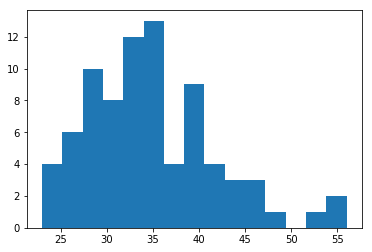

In [404]:
plt.hist(officer_stats['Officer Age'], bins = 15)

In [408]:
(officer_stats['Officer Age']<34).mean()

0.5

In [410]:
(officer_stats['Officer Age']>45).mean()

0.074999999999999997

In [413]:
(officer_stats['Officer Age']>42).mean()

0.125

In [412]:
(officer_stats['Officer Age']>40).mean()

0.17499999999999999

(array([ 19.,  20.,  10.,  12.,   5.,   7.,   2.,   2.,   2.,   1.]),
 array([  0.1 ,   2.77,   5.44,   8.11,  10.78,  13.45,  16.12,  18.79,
         21.46,  24.13,  26.8 ]),
 <a list of 10 Patch objects>)

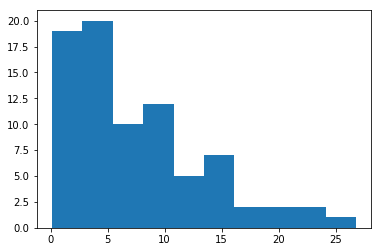

In [415]:
plt.hist(officer_stats['Years LE Experience'], bins = 10)

In [ ]:
officer_stat

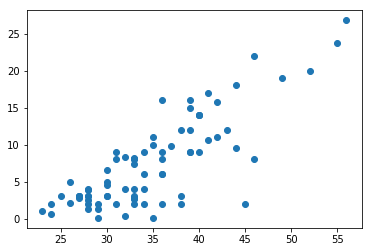

In [417]:
plt.scatter(officer_stats['Officer Age'], officer_stats['Years LE Experience'])

In [420]:
officer_stats.to_csv('officers.csv',index=False)

In [440]:
df['officer_White'].mean()

0.75

In [441]:
df['officer_Black'].mean()

0.075

In [442]:
df['officer_Asian'].mean()

0.0125

In [443]:
df['officer_Hispanic'].mean()

0.1625

In [445]:
df['officer_Female'].mean()

0.025

In [447]:
df['cpl'].mean()

0.0375

In [448]:
df['ofc'].mean()

0.7875

In [450]:
df['det'].mean()

0.0625

In [451]:
df['sgt'].mean()

0.0375

In [452]:
df['Officer Age'].describe()

count    80.000000
mean     34.800000
std       7.001627
min      23.000000
25%      29.750000
50%      33.500000
75%      39.000000
max      56.000000
Name: Officer Age, dtype: float64

In [453]:
df['Years LE Experience'].describe()

count    80.000000
mean      7.393750
std       6.030331
min       0.100000
25%       2.800000
50%       6.000000
75%      10.075000
max      26.800000
Name: Years LE Experience, dtype: float64

In [888]:
df['Mon'].mean()

0.27500000000000002

In [456]:
df['Subject Age'].describe()

count    80.000000
mean     33.400000
std      12.623667
min      16.000000
25%      25.000000
50%      30.000000
75%      38.000000
max      72.000000
Name: Subject Age, dtype: float64

In [457]:
df['subject_Asian'].mean()

0.025

In [458]:
df['subject_Black'].mean()

0.2625

In [459]:
df['subject_White'].mean()

0.5125

In [461]:
df['subject_Hispanic'].mean()

0.2

In [464]:
df['subject_Male'].mean()

0.95

In [465]:
df[df['subject_Black']==1]['killed'].mean()

0.42857142857142855

In [466]:
df[df['subject_White']==1]['killed'].mean()

0.6341463414634146

In [877]:
df.shape

(80, 77)

In [468]:
df['officer_knew_subject_armed'].mean()

0.7625

In [469]:
df[df['subject_Black']==1]['officer_knew_subject_armed'].mean()

0.5238095238095238

In [470]:
df[df['subject_White']==1]['officer_knew_subject_armed'].mean()

0.8780487804878049

In [471]:
df[df['subject_Hispanic']==1]['officer_knew_subject_armed'].mean()

0.75

In [475]:
df[(df['subject_Black']==1)&(df['officer_knew_subject_armed']==1)]['killed'].mean()

0.18181818181818182

In [666]:
Austin.columns.values

array(['zip_code', 'professionl_degree', 'professional_degree_P',
       'population_P', 'population', 'owner_occupied_P', 'owner_occupied',
       'mortgage_income_P', 'mortgage_income', 'median_rooms_P',
       'median_rooms', 'median_income_P', 'median_income', 'cost_living_P',
       'cost_living', 'college_degree_P', 'college_degree',
       'average_household_P', 'average_household', 'age2544', 'age3554',
       'age4564', 'age55', 'age65', 'educationcollegegraduate',
       'educationgraduateplus', 'educationhighschool',
       'educationsomecollege', 'employmentbluecollarmix',
       'employmentmanagementandprofessional', 'employmentmix',
       'employmentmostlyretired', 'employmentservicemix',
       'familyfamilymix', 'familymostlywkids', 'familymostlywokids',
       'familywokids', 'housinghomeowners', 'housingmix',
       'housingmostlyowners', 'housingmostlyrenters', 'housingrenters',
       'incomedownscale', 'incomelowermidscale', 'incomelowincome',
       'incomemidsca

In [987]:
austin = Austin[['population_P', 'population','median_income_P', 'median_income',
               'age2544', 'age3554',
       'age4564', 'age55', 'age65', 'educationcollegegraduate',
       'educationgraduateplus', 'educationhighschool', 
       'employmentmanagementandprofessional', 
       'employmentmostlyretired', 'employmentservicemix', 'urbanicityrural', 'urbanicitysecondcity',
       'urbanicitysuburban', 'urbanicitytown', 'urbanicityurban',  'familymostlywkids', 'familymostlywokids',
       'familywokids', 
       'housingmostlyowners', 'housingmostlyrenters', 'housingrenters',
       'incomedownscale', 'incomelowermidscale', 'incomelowincome',
        'incomeuppermidscale', 'incomeupscale',
       'incomewealthy', 'ipabelowavg', 'ipaelite',
       'ipahigh', 'ipalow', 'ipamillionaires', 'urbanicitymetromix']]

In [928]:
austin = Austin[['professionl_degree', 'professional_degree_P',
       'population_P', 'population', 'owner_occupied_P', 'owner_occupied',
       'median_income_P', 'median_income', 'cost_living_P',
       'cost_living', 'college_degree_P', 'college_degree',
       'age2544', 'age3554',
       'age4564', 'age55', 'age65', 'educationcollegegraduate',
       'educationgraduateplus', 'educationhighschool', 'urbanicityurban',
       'employmentmanagementandprofessional', 
       'employmentmostlyretired', 'employmentservicemix',  'familymostlywkids', 'familymostlywokids',
       'familywokids',
       'housingmostlyowners', 'housingmostlyrenters', 'housingrenters',
       'incomedownscale', 'incomelowermidscale', 'incomelowincome',
        'incomeuppermidscale', 'incomeupscale']]

In [988]:
cols = ['population_P', 'population','median_income_P', 'median_income',
               'age2544', 'age3554',
       'age4564', 'age55', 'age65', 'educationcollegegraduate',
       'educationgraduateplus', 'educationhighschool', 
       'employmentmanagementandprofessional', 
       'employmentmostlyretired', 'employmentservicemix', 'urbanicityrural', 'urbanicitysecondcity',
       'urbanicitysuburban', 'urbanicitytown', 'urbanicityurban',  'familymostlywkids', 'familymostlywokids',
       'familywokids', 
       'housingmostlyowners', 'housingmostlyrenters', 'housingrenters',
       'incomedownscale', 'incomelowermidscale', 'incomelowincome',
        'incomeuppermidscale', 'incomeupscale',
       'incomewealthy', 'ipabelowavg', 'ipaelite',
       'ipahigh', 'ipalow', 'ipamillionaires', 'urbanicitymetromix']

In [929]:
cols = ['professionl_degree', 'professional_degree_P',
       'population_P', 'population', 'owner_occupied_P', 'owner_occupied',
       'median_income_P', 'median_income', 'cost_living_P',
       'cost_living', 'college_degree_P', 'college_degree',
       'age2544', 'age3554',
       'age4564', 'age55', 'age65', 'educationcollegegraduate',
       'educationgraduateplus', 'educationhighschool', 'urbanicityurban',
       'employmentmanagementandprofessional', 
       'employmentmostlyretired', 'employmentservicemix',  'familymostlywkids', 'familymostlywokids',
       'familywokids',
       'housingmostlyowners', 'housingmostlyrenters', 'housingrenters',
       'incomedownscale', 'incomelowermidscale', 'incomelowincome',
        'incomeuppermidscale', 'incomeupscale']

In [989]:
len(cols)

38

In [668]:
cols = ['professionl_degree', 'professional_degree_P',
       'population_P', 'population', 'owner_occupied_P', 'owner_occupied',
       'mortgage_income_P', 'mortgage_income', 'median_rooms_P',
       'median_rooms', 'median_income_P', 'median_income', 'cost_living_P',
       'cost_living', 'college_degree_P', 'college_degree',
       'average_household_P', 'average_household']

In [990]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [991]:
from sklearn.cluster import KMeans

In [992]:
ss= StandardScaler()

In [993]:
df = pd.read_csv('shooting_data.csv')

In [994]:
austin = ss.fit_transform(austin)

In [995]:
austin = ms.fit_transform(austin)

In [996]:
km = KMeans(n_clusters = 5)

In [997]:
km.fit(austin)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [998]:
austin = pd.DataFrame(austin, columns = cols)

In [999]:
austin['clusters'] = km.labels_

In [1000]:
k = []
for s in Austin['zip_code']:
    k.append(s)

In [1001]:
austin['zip_code'] = k

In [1002]:
df['zip_code'] = df['zip_code'].astype(str)
austin['zip_code'] = austin['zip_code'].astype(str)

In [1022]:
police_data = pd.merge(austin[['clusters', 'zip_code']], df, on= 'zip_code')

In [1004]:
Austin = pd.merge(austin[['clusters', 'zip_code']], Austin, on= 'zip_code')

In [1023]:
police_data.head()

,clusters,zip_code,Date_x,Time,Number of Officer Shooters,Officers Present When Shots Fired,Hits,address,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside_outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Subject Age,subject_Hispanic,subject_White,subject_Black,subject_Asian,subject_Male,subject_Female,killed,no injury,shot,injured,suicide,Officer Name,Officer Age,Years LE Experience,Officer Weapon Caliber,# Shots Fired by Officer,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female,jurisd_APD,jurisd_TCSO,jurisd_TABC,jurisd_US Marshal,jurisd_Park Police,previous_OIS,officer_knew_subject_armed,join,rank,officer-race
0,3,78731,2012-02-03,21:33,1,16,1,7201 Wood Hollow Dr,12,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,1,0,0,1,0,0,0,1,0,0,Ofc. Shaun Donovan,33,2.0,0.40,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2012-02-03 00:00:00720,ofc,white
1,0,78728,2014-09-08,19:38,3,3,2,13712 Maye Pl.,14,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,1,0,0,1,0,1,0,0,0,0,Det. Philip Hogue,41,17.0,0.40,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2014-09-08 00:00:00137,det,white
2,0,78728,2014-09-08,19:38,3,3,2,13712 Maye Pl.,14,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,1,0,0,1,0,1,0,0,0,0,Det. Scott Glasgow,40,14.0,0.40,9,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,2014-09-08 00:00:00137,det,white
3,1,78748,2015-01-23,3:45,1,4,2,120 W Slaughter Ln,15,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,61,0,1,0,0,1,0,1,0,0,0,0,Ofc. Daniel Hannah,26,2.1,0.40,3,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2015-01-23 00:00:00120,ofc,white
4,1,78748,2009-12-28,2:54,2,3,1,11815 Johnny Weismuller Ln,9,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38,0,0,1,0,1,0,1,0,0,0,0,Ofc. Justin Berry,24,2.0,0.40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2009-12-28 00:00:00118,ofc,white


In [1006]:
(police_data['clusters']==3).mean()

0.025316455696202531

In [1018]:
police_data[(police_data['clusters']==2)]['zip_code'].unique()

array(['78745', '78758', '78704', '78723', '78744', '78753', '78705',
       '78701', '78702', '78741', '78752', '78757'], dtype=object)

In [1026]:
Austin[(Austin['clusters_x']==2)]['population'].sum()/float(Austin['population'].sum())

0.4362553986702491

In [1009]:
(police_data['clusters']==1).mean()

0.11392405063291139

In [1012]:
(police_data['clusters']==2).mean()

0.79746835443037978

In [1021]:
austin.to_csv('zip_code_clusters.csv', index=False)

In [1025]:
police2.to_csv('police2_with_clusters.csv', index=False)

In [1024]:
new_matrix = []
things = {}
matrix = police_data.as_matrix()
for row in matrix:
    if row[-3] in things:
        pass
    else:
        things[row[-3]]=2
        new_matrix.append(row)
police2 = pd.DataFrame(new_matrix, columns = police_data.columns)

In [890]:
police2['bad_zips'] = police2.apply(badZip,axis=1)

In [891]:
police2['bad_zips'].mean(0)

0.7719298245614035

In [893]:
police2['Mon'].mean()

0.24561403508771928

In [717]:
(police2['clusters']==0).mean()

0.78947368421052633

In [619]:
for i in austin.columns:
    print i
    print 'cluster 2: ' + str(austin[(austin['clusters']==2)][i].mean())
    print 'overall: ' + str(austin[i].mean())

population_P
cluster 2: 0.748493975904
overall: 0.625060240964
median_income
cluster 2: 0.180224152781
overall: 0.38948586796
college_degree_P
cluster 2: 0.747252747253
overall: 0.798021978022
age2544
cluster 2: 0.40625
overall: 0.41
age3554
cluster 2: 0.575
overall: 0.504
age4564
cluster 2: 0.0
overall: 0.1
age55
cluster 2: 0.25
overall: 0.17
age65
cluster 2: 0.0
overall: 0.2
educationcollegegraduate
cluster 2: 0.2375
overall: 0.412
educationgraduateplus
cluster 2: 0.4
overall: 0.352
educationhighschool
cluster 2: 0.0
overall: 0.16
employmentmanagementandprofessional
cluster 2: 0.515625
overall: 0.49
employmentmostlyretired
cluster 2: 0.0
overall: 0.08
employmentservicemix
cluster 2: 0.09375
overall: 0.27
familymostlywkids
cluster 2: 0.229166666667
overall: 0.266666666667
familymostlywokids
cluster 2: 0.75
overall: 0.435
familywokids
cluster 2: 0.0
overall: 0.22
housingmostlyowners
cluster 2: 0.125
overall: 0.312
housingmostlyrenters
cluster 2: 0.0
overall: 0.24
housingrenters
cluster

In [853]:
bad_zips = []
for zip in austin[(austin['clusters']==0)]['zip_code']:
    bad_zips.append(zip)

In [854]:
bad_zips

['78745',
 '78751',
 '78703',
 '78758',
 '78704',
 '78723',
 '78744',
 '78753',
 '78705',
 '78756',
 '78701',
 '78702',
 '78741',
 '78752',
 '78722',
 '78757']

In [766]:
bad_zips = ['78745',
 '78751',
 '78758',
 '78704',
 '78723',
 '78744',
 '78753',
 '78705',
 '78756',
 '78701',
 '78702',
 '78741',
 '78752',
 '78722']

In [767]:
len(bad_zips)

14

In [733]:
def badZip(row):
    if row['zip_code'] in  bad_zips:
        return 1
    else:
        return 0

In [734]:
Austin['bad_zips']  = Austin.apply(badZip, axis=1)

In [735]:
Austin['bad_zips'].mean()

0.28

In [736]:
Austin[Austin['bad_zips']==1]['population'].sum()

386720

In [629]:
Austin.columns

Index([u'zip_code', u'professionl_degree', u'professional_degree_P',
       u'population_P', u'population', u'owner_occupied_P', u'owner_occupied',
       u'mortgage_income_P', u'mortgage_income', u'median_rooms_P',
       ...
       u'techclasshighest', u'techclasslowest', u'urbanicitymetromix',
       u'urbanicityrural', u'urbanicitysecondcity', u'urbanicitysuburban',
       u'urbanicitytown', u'urbanicityurban', u'Austin', u'bad_zips'],
      dtype='object', length=162)

In [737]:
bads = Austin[Austin['bad_zips']==1]

In [738]:
for col in Austin.columns:
    print col
    try:
        print 'bads: ' + str(bads[col].mean())
        print 'overall: ' + str(Austin[col].mean())
    except:
        pass
        

zip_code
bads: 5.62469910842e+68
overall: 1.57227574356e+248
professionl_degree
bads: 36.0357142857
overall: 45.748
professional_degree_P
bads: 64.5714285714
overall: 78.3
population_P
bads: 76.3571428571
overall: 65.88
population
bads: 27622.8571429
overall: 19606.68
owner_occupied_P
bads: 3.92857142857
overall: 37.96
owner_occupied
bads: 35.7285714286
overall: 63.19
mortgage_income_P
bads: 62.3571428571
overall: 52.12
mortgage_income
bads: 22.1071428571
overall: 21.34
median_rooms_P
bads: 3.85714285714
overall: 44.8
median_rooms
bads: 3.97857142857
overall: 5.388
median_income_P
bads: 33.1428571429
overall: 70.44
median_income
bads: 33161.7857143
overall: 59057.26
cost_living_P
bads: 56.2857142857
overall: 69.16
cost_living
bads: 123.592857143
overall: 167.904
college_degree_P
bads: 73.2857142857
overall: 80.62
college_degree
bads: 33.8928571429
overall: 42.304
average_household_P
bads: 39.2857142857
overall: 53.36
average_household
bads: 2.42857142857
overall: 2.632
age2544
bads: 1.

In [768]:
police1 = pd.read_csv('../Downloads/HackAustin2017-master/Data/Police_append_1.csv')
police2 = pd.read_csv('../Downloads/HackAustin2017-master/Data/Police_append_2.csv')

In [769]:
police = pd.concat([police1, police2])

In [790]:
def addZip(row):
    try:
        row['0'].split(' ')[1]
        if '78' in row['0']:
            return '78' + row['0'].split('78')[1][:3]
        else:
            return np.nan
    except:
        return np.nan


In [791]:
police['zip_code'] = police.apply(addZip, axis=1)

In [795]:
apd = pd.read_table('../Downloads/APD 911 Calls 2012-2017 - Sheet 1.csv')

In [800]:
apd.shape

(65534, 8)

In [801]:
police.shape

(2057, 3)

In [802]:
response_data = pd.merge(police, apd, right_index=True, left_index=True)

In [803]:
response_data.shape

(2057, 11)

In [806]:
response_data['Time First Unit Arrived'] = response_data['Time First Unit Arrived'].apply(lambda x: pd.to_datetime(x))

In [807]:
response_data['Time PhonePickUp'] = response_data['Time PhonePickUp'].apply(lambda x: pd.to_datetime(x))

In [808]:
response_data['delta'] = response_data['Time First Unit Arrived']- response_data['Time PhonePickUp']

In [814]:
def minutes(row):
    try:
        seconds = row['delta'].seconds
        return seconds/60.0
    except:
        return np.nan
response_data['minutes'] = response_data.apply(minutes, axis=1)

In [861]:
response_data.shape

(1597, 13)

In [819]:
response_data.dropna(inplace=True)

In [823]:
new_data = response_data[(response_data['minutes']!=0)]

In [897]:
response_data.drop('Unnamed: 0', axis=1 ,inplace=True)

In [898]:
response_data.to_csv('response_data.csv', index=False)

In [824]:
new_data.shape

(1097, 13)

In [855]:
new_data['minutes'].mean(0)

54.06981160741422

In [831]:
np.percentile(new_data['minutes'], 99)

1439.9833333333333

In [833]:
zips = list(new_data['zip_code'].unique())

In [838]:
new_matrix = []
for zip in zips:
    new_matrix.append([zip, new_data[new_data['zip_code']==zip]['minutes'].mean(), new_data[new_data['zip_code']==zip].shape[0]])
ddd = pd.DataFrame(new_matrix, columns = ['zip_code', 'average_response_time (m)', 'examples'])

In [844]:
ddd.head(1)

,zip_code,average_response_time (m),examples
0,78741,103.357222,90


In [851]:
ave_response_cl = []
for i in range(5):
    response = 0
    sums = 0
    for zip in austin[(austin['clusters']==i)]['zip_code']:
        try:
            response+= ddd[ddd['zip_code']==zip]['average_response_time (m)'].iloc[0]*ddd[ddd['zip_code']==zip]['examples'].iloc[0]
            sums +=ddd[ddd['zip_code']==zip]['examples'].iloc[0]

            
        except:
            pass
    ave_response_cl.append([i, response/sums, sums])    

In [852]:
a = np.array(ave_response_cl)

[[0, 50.244511702986287, 826],
 [1, 59.299999999999997, 40],
 [2, 117.95777777777775, 30],
 [3, 24.524796747967478, 41],
 [4, 78.610864197530887, 135]]

In [860]:
826/1072.0

0.7705223880597015

In [862]:
bad_zips

['78745',
 '78751',
 '78703',
 '78758',
 '78704',
 '78723',
 '78744',
 '78753',
 '78705',
 '78756',
 '78701',
 '78702',
 '78741',
 '78752',
 '78722',
 '78757']

In [863]:
bad_zips = ['78745',
 '78751',
 '78758',
 '78704',
 '78723',
 '78744',
 '78753',
 '78705',
 '78756',
 '78701',
 '78702',
 '78741',
 '78752',
 '78722']

In [864]:
len(bad_zips)

14

In [866]:
len(['78745',
 '78751',
 '78703',
 '78758',
 '78704',
 '78723',
 '78744',
 '78753',
 '78705',
 '78756',
 '78701',
 '78702',
 '78741',
 '78752',
 '78722',
 '78757'])

16

,Unnamed: 0,0,zip_code,CAD Number,Response_Date,Call Date,Initial Problem Type,Final Problem Type,Block Address,Time PhonePickUp,Time First Unit Arrived,delta,minutes
0,0,"1300 Crossing Pl, Austin, TX 78741, USA",78741,122871877,2012-10-13 22:25:44,10/13/2012,Crash Service,xCRASH LEAVING THE SCENE,1300 Block CROSSING PL,2012-10-13 22:22:56,2012-10-13 22:58:36.000,00:35:40,35.666667
0,0,"5300 Indio Cir, Austin, TX 78745, USA",78745,122871877,2012-10-13 22:25:44,10/13/2012,Crash Service,xCRASH LEAVING THE SCENE,1300 Block CROSSING PL,2012-10-13 22:22:56,2012-10-13 22:58:36.000,00:35:40,35.666667
5,5,"6500 River Pl Blvd, Austin, TX 78730, USA",78730,163210559,2016-11-16 09:34:58,11/16/2016,Service,Service,6500 Block River Place Blvd,2016-11-16 09:33:33,2016-11-16 10:06:02.183,00:32:29.183000,32.483333
5,5,"200 Lavaca St, Austin, TX 78701, USA",78701,163210559,2016-11-16 09:34:58,11/16/2016,Service,Service,6500 Block River Place Blvd,2016-11-16 09:33:33,2016-11-16 10:06:02.183,00:32:29.183000,32.483333
6,6,"3300 Esperanza Crossing, Austin, TX 78758, USA",78758,120291114,2012-01-29 16:52:19,01/29/2012,Disturbance Urgent,xASSAULT BY CONTACT,3300 Block Esperanza Xing,2012-01-29 16:51:43,2012-01-29 17:04:41.000,00:12:58,12.966667


In [1027]:
police2.head()

,clusters,zip_code,Date_x,Time,Number of Officer Shooters,Officers Present When Shots Fired,Hits,address,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside_outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Subject Age,subject_Hispanic,subject_White,subject_Black,subject_Asian,subject_Male,subject_Female,killed,no injury,shot,injured,suicide,Officer Name,Officer Age,Years LE Experience,Officer Weapon Caliber,# Shots Fired by Officer,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female,jurisd_APD,jurisd_TCSO,jurisd_TABC,jurisd_US Marshal,jurisd_Park Police,previous_OIS,officer_knew_subject_armed,join,rank,officer-race
0,3,78731,2012-02-03,21:33,1,16,1,7201 Wood Hollow Dr,12,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,1,0,0,1,0,0,0,1,0,0,Ofc. Shaun Donovan,33,2.0,0.40,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2012-02-03 00:00:00720,ofc,white
1,0,78728,2014-09-08,19:38,3,3,2,13712 Maye Pl.,14,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,1,0,0,1,0,1,0,0,0,0,Det. Philip Hogue,41,17.0,0.40,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2014-09-08 00:00:00137,det,white
2,1,78748,2015-01-23,3:45,1,4,2,120 W Slaughter Ln,15,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,61,0,1,0,0,1,0,1,0,0,0,0,Ofc. Daniel Hannah,26,2.1,0.40,3,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2015-01-23 00:00:00120,ofc,white
3,1,78748,2009-12-28,2:54,2,3,1,11815 Johnny Weismuller Ln,9,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38,0,0,1,0,1,0,1,0,0,0,0,Ofc. Justin Berry,24,2.0,0.40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2009-12-28 00:00:00118,ofc,white
4,2,78745,2015-07-12,12:51,1,2,2,9400 Claxton Dr.,15,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,62,0,1,0,0,1,0,1,0,0,0,0,Ofc. Patrick Cheatham,35,9.9,0.40,2,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,2015-07-12 00:00:00940,ofc,white


In [1034]:
for el in police2.groupby('zip_code')['clusters'].count():
    
    print el

4
2
1
3
1
7
1
1
1
2
7
3
4
2
3
1
1
7
1
5


In [1044]:
df = pd.DataFrame(police2.groupby('zip_code')['clusters'].count())

In [1045]:
df.reset_index(inplace=True)

In [1051]:
df.rename_axis(mapper={'clusters': 'shootings'},inplace=True, axis=1)

In [1052]:
df.head()

,zip_code,shootings
0,78701,4
1,78702,2
2,78704,1
3,78705,3
4,78721,1


In [1053]:
things = pd.merge(df, austin, on = 'zip_code', how= 'right')

In [1054]:
things.head()

,zip_code,shootings,population_P,population,median_income_P,median_income,age2544,age3554,age4564,age55,age65,educationcollegegraduate,educationgraduateplus,educationhighschool,employmentmanagementandprofessional,employmentmostlyretired,employmentservicemix,urbanicityrural,urbanicitysecondcity,urbanicitysuburban,urbanicitytown,urbanicityurban,familymostlywkids,familymostlywokids,familywokids,housingmostlyowners,housingmostlyrenters,housingrenters,incomedownscale,incomelowermidscale,incomelowincome,incomeuppermidscale,incomeupscale,incomewealthy,ipabelowavg,ipaelite,ipahigh,ipalow,ipamillionaires,urbanicitymetromix,clusters
0,78701,4.0,0.192771,0.031267,0.404040,0.184710,0.50,0.4,0.0,0.5,0.0,0.2,0.8,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.75,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.000000,0.666667,0.2,0.0,0.00,0.5,0.00,1.0,0.0,2
1,78702,2.0,0.759036,0.398654,0.040404,0.075652,0.50,0.6,0.0,0.0,0.0,0.4,0.4,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.75,0.0,0.4,0.0,0.333333,0.0,0.0,0.0,0.000000,0.666667,0.0,0.5,0.25,0.0,0.25,0.0,0.0,2
2,78704,1.0,0.975904,0.807788,0.393939,0.184499,0.50,0.4,0.0,0.5,0.0,0.2,0.4,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.75,0.0,0.0,0.0,1.000000,0.5,1.0,0.0,0.000000,0.333333,0.2,0.5,0.00,0.0,0.25,0.5,0.0,2
3,78705,3.0,0.831325,0.486467,0.000000,0.000000,0.50,0.6,0.0,0.0,0.0,0.2,0.6,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.75,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.333333,0.2,0.5,0.00,0.5,0.00,0.5,0.0,2
4,78721,1.0,0.518072,0.157118,0.090909,0.104637,0.25,0.4,0.0,0.5,0.5,0.4,0.0,1.0,0.00,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.000000,0.50,1.0,0.0,1.0,0.333333,1.0,1.0,0.5,0.333333,0.000000,0.0,0.0,0.00,0.0,1.00,0.0,0.6,0


In [1055]:
things.columns

Index([u'zip_code', u'shootings', u'population_P', u'population',
       u'median_income_P', u'median_income', u'age2544', u'age3554',
       u'age4564', u'age55', u'age65', u'educationcollegegraduate',
       u'educationgraduateplus', u'educationhighschool',
       u'employmentmanagementandprofessional', u'employmentmostlyretired',
       u'employmentservicemix', u'urbanicityrural', u'urbanicitysecondcity',
       u'urbanicitysuburban', u'urbanicitytown', u'urbanicityurban',
       u'familymostlywkids', u'familymostlywokids', u'familywokids',
       u'housingmostlyowners', u'housingmostlyrenters', u'housingrenters',
       u'incomedownscale', u'incomelowermidscale', u'incomelowincome',
       u'incomeuppermidscale', u'incomeupscale', u'incomewealthy',
       u'ipabelowavg', u'ipaelite', u'ipahigh', u'ipalow', u'ipamillionaires',
       u'urbanicitymetromix', u'clusters'],
      dtype='object')

In [1128]:
predictors = [ u'population_P', u'population',
       u'median_income_P', u'median_income', u'age2544', u'age3554',
       u'age4564', u'age55', u'age65', u'educationcollegegraduate',
       u'educationgraduateplus', u'educationhighschool',
       u'employmentmanagementandprofessional', u'employmentmostlyretired',
       u'employmentservicemix', u'urbanicityrural', u'urbanicitysecondcity',
       u'urbanicitysuburban', u'urbanicitytown', u'urbanicityurban',
       u'familymostlywkids', u'familymostlywokids', u'familywokids',
       u'housingmostlyowners', u'housingmostlyrenters', u'housingrenters',
        u'incomelowermidscale', u'incomelowincome',
       u'incomeuppermidscale', u'incomeupscale', u'incomewealthy',
       u'ipabelowavg', u'ipaelite', u'ipahigh', u'ipalow', u'ipamillionaires',
       u'urbanicitymetromix']
label = 'shootings'

In [1129]:
from sklearn.linear_model import Ridge, Lasso

In [1130]:
from sklearn.model_selection import train_test_split

In [1131]:
X = things[predictors]
y = things[label]

In [1132]:
Xss = ss.fit_transform(X)

In [1135]:
things.fillna(0,inplace=True)

In [1155]:
sub_thing = things.sample(35)
X = sub_thing[predictors]
y = sub_thing[label]

model = Lasso(alpha=.12)
ss = StandardScaler()
ms =MinMaxScaler()
Xss = ss.fit_transform(X)
Xss = ms.fit_transform(Xss)
model.fit(Xss, y)
for i, pred in enumerate(predictors):
    if model.coef_[i]<.001 and model.coef_[i]>-.001:
        pass
    else:
        print pred
        print model.coef_[i]

population
0.678571745389
urbanicityurban
0.546004565444
incomelowermidscale
1.08033581572


In [1164]:
for i in range(200):
    sub_thing = things.sample(30)
    X = sub_thing[predictors]
    y = sub_thing[label]
    
    model = Lasso(alpha=.2)
    ss = StandardScaler()
    ms =MinMaxScaler()
    Xss = ss.fit_transform(X)
    Xss = ms.fit_transform(Xss)
    model.fit(Xss, y)
    if i ==0:
        coefficients = model.coef_
    else:
        coefficients+= model.coef_


tt = []
for i, co in enumerate(coefficients):
    tt.append([co, predictors[i]])

tt.sort(reverse=True)

tt

[[225.12869624688068, u'incomelowermidscale'],
 [94.270274718018683, u'urbanicityurban'],
 [57.641555333769304, u'population'],
 [18.7863847052929, u'ipabelowavg'],
 [10.736335544799703, u'housingrenters'],
 [6.4524514860646738, u'age3554'],
 [4.8928299349181756, u'familymostlywokids'],
 [1.1747304612442098, u'population_P'],
 [1.1431603590282715, u'incomelowincome'],
 [0.43669616361379138, u'ipahigh'],
 [0.0, u'urbanicitysuburban'],
 [0.0, u'urbanicitysecondcity'],
 [0.0, u'urbanicityrural'],
 [0.0, u'urbanicitymetromix'],
 [-0.0, u'median_income'],
 [0.0, u'ipamillionaires'],
 [0.0, u'ipalow'],
 [0.0, u'ipaelite'],
 [0.0, u'incomewealthy'],
 [0.0, u'incomeupscale'],
 [-0.0, u'incomeuppermidscale'],
 [0.0, u'housingmostlyowners'],
 [0.0, u'familymostlywkids'],
 [0.0, u'employmentservicemix'],
 [-0.0, u'employmentmostlyretired'],
 [0.0, u'employmentmanagementandprofessional'],
 [-0.0, u'educationhighschool'],
 [0.0, u'educationgraduateplus'],
 [0.0, u'educationcollegegraduate'],
 [-0.0

In [1168]:
police_data['year'].max()

16

In [ ]:
tt = []
for i, co in enumerate(coefficients):
    tt.append([co, predictors[i]])

tt.sort(reverse=True)

tt

In [1170]:
police2.head()

,clusters,zip_code,Date_x,Time,Number of Officer Shooters,Officers Present When Shots Fired,Hits,address,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside_outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Subject Age,subject_Hispanic,subject_White,subject_Black,subject_Asian,subject_Male,subject_Female,killed,no injury,shot,injured,suicide,Officer Name,Officer Age,Years LE Experience,Officer Weapon Caliber,# Shots Fired by Officer,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female,jurisd_APD,jurisd_TCSO,jurisd_TABC,jurisd_US Marshal,jurisd_Park Police,previous_OIS,officer_knew_subject_armed,join,rank,officer-race
0,3,78731,2012-02-03,21:33,1,16,1,7201 Wood Hollow Dr,12,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,1,0,0,1,0,0,0,1,0,0,Ofc. Shaun Donovan,33,2.0,0.40,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2012-02-03 00:00:00720,ofc,white
1,0,78728,2014-09-08,19:38,3,3,2,13712 Maye Pl.,14,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,1,0,0,1,0,1,0,0,0,0,Det. Philip Hogue,41,17.0,0.40,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2014-09-08 00:00:00137,det,white
2,1,78748,2015-01-23,3:45,1,4,2,120 W Slaughter Ln,15,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,61,0,1,0,0,1,0,1,0,0,0,0,Ofc. Daniel Hannah,26,2.1,0.40,3,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2015-01-23 00:00:00120,ofc,white
3,1,78748,2009-12-28,2:54,2,3,1,11815 Johnny Weismuller Ln,9,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38,0,0,1,0,1,0,1,0,0,0,0,Ofc. Justin Berry,24,2.0,0.40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2009-12-28 00:00:00118,ofc,white
4,2,78745,2015-07-12,12:51,1,2,2,9400 Claxton Dr.,15,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,62,0,1,0,0,1,0,1,0,0,0,0,Ofc. Patrick Cheatham,35,9.9,0.40,2,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,2015-07-12 00:00:00940,ofc,white


In [1171]:
def subject_race(row):
    if row['subject_Hispanic']==1:
        return 'Hispanic'
    elif row['subject_White']==1:
        return 'White'
    elif row['subject_Black']==1:
        return 'Black'
    else:
        return 'Asian'

In [1173]:
police2['subject_race'] = police2.apply(subject_race, axis=1)

In [1174]:
police2.head()

,clusters,zip_code,Date_x,Time,Number of Officer Shooters,Officers Present When Shots Fired,Hits,address,year,Fri,Mon,Sat,Sun,Thur,Tue,Wed,inside,inside_outside,outside,knife,gun,no_weapon,other weapon,vehicle,other_weapon,night,day,day_nights,Parking Lot,Business,Under Bridge,Street,Yard/Courtyard,Residence,Residence / Parking Lot,Park,lethal,taser,impact_weapon,weaponless,Subject Age,subject_Hispanic,subject_White,subject_Black,subject_Asian,subject_Male,subject_Female,killed,no injury,shot,injured,suicide,Officer Name,Officer Age,Years LE Experience,Officer Weapon Caliber,# Shots Fired by Officer,cpl,ofc,det,other,sgt,officer_White,officer_Hispanic,officer_Black,officer_Asian,officer_Male,officer_Female,jurisd_APD,jurisd_TCSO,jurisd_TABC,jurisd_US Marshal,jurisd_Park Police,previous_OIS,officer_knew_subject_armed,join,rank,officer-race,subject_race
0,3,78731,2012-02-03,21:33,1,16,1,7201 Wood Hollow Dr,12,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,1,0,0,1,0,0,0,1,0,0,Ofc. Shaun Donovan,33,2.0,0.40,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2012-02-03 00:00:00720,ofc,white,White
1,0,78728,2014-09-08,19:38,3,3,2,13712 Maye Pl.,14,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,1,0,0,1,0,1,0,0,0,0,Det. Philip Hogue,41,17.0,0.40,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2014-09-08 00:00:00137,det,white,White
2,1,78748,2015-01-23,3:45,1,4,2,120 W Slaughter Ln,15,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,61,0,1,0,0,1,0,1,0,0,0,0,Ofc. Daniel Hannah,26,2.1,0.40,3,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2015-01-23 00:00:00120,ofc,white,White
3,1,78748,2009-12-28,2:54,2,3,1,11815 Johnny Weismuller Ln,9,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38,0,0,1,0,1,0,1,0,0,0,0,Ofc. Justin Berry,24,2.0,0.40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2009-12-28 00:00:00118,ofc,white,Black
4,2,78745,2015-07-12,12:51,1,2,2,9400 Claxton Dr.,15,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,62,0,1,0,0,1,0,1,0,0,0,0,Ofc. Patrick Cheatham,35,9.9,0.40,2,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,2015-07-12 00:00:00940,ofc,white,White


In [1175]:
police2.to_csv('police2_with_clusters.csv', index=False)

In [ ]:
ßß